<a href="https://colab.research.google.com/github/rohitrv8922/rohitrv8922/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
df=pd.read_excel('/content/drive/MyDrive/Data Science Assignment/DS - Assignment Part 1 data set.xlsx')

In [21]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [22]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Conenience stores                         414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Bedrooms                                  414 non-null    int64  
 7   House_sqft                                414 non-null    int64  
 8   House price                               414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [63]:
df.rename(columns={'Number of bedrooms':'Bedrooms','Transaction date':'Transaction_date','Conenience stores':'Convenience_stores','House price':'House_price','House size (sqft)':'House_sqft','House Age':'House_age','Distance from nearest Metro station (km)':'Metro_stations'},inplace=True)
df.head()

,Transaction_date,House_age,Metro_stations,Convenience_stores,latitude,longitude,Bedrooms,House_sqft,House_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#Let see the bedroom wise most common houses

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

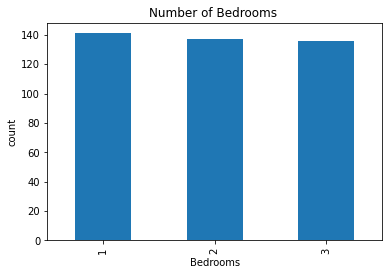

In [56]:
df['Bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms ')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

#Visualize House location based on their latitudes and longitudes

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

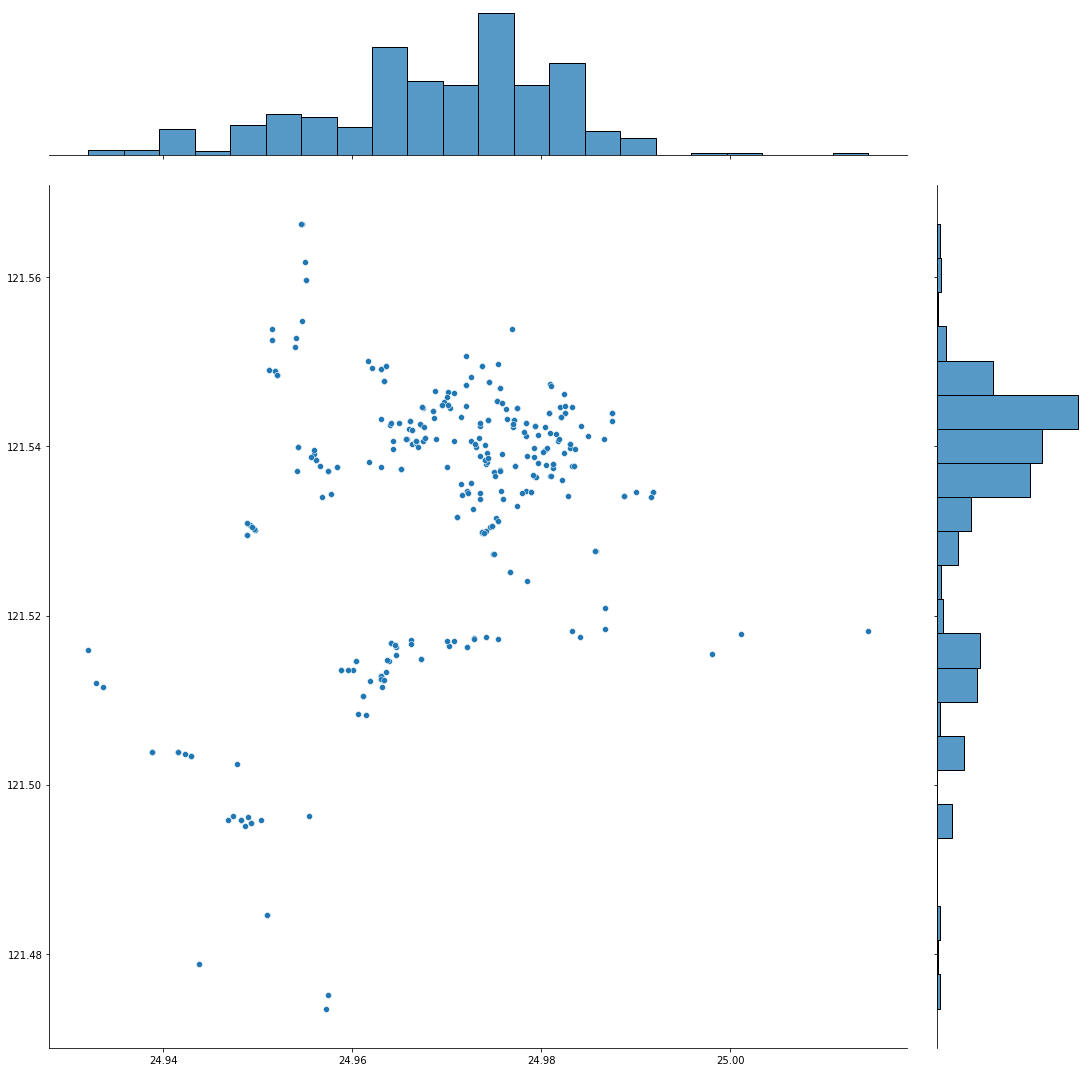

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [38]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df.latitude.values,y=df.longitude.values,size=15)
plt.xlabel('Latitudes',fontsize=10)
plt.ylabel('Longitudes',fontsize=10)
plt.show()
sns.despine

#Now let see how the common factors affecting the price of the Houses

Text(0.5, 1.0, 'House price VS House_sqft')

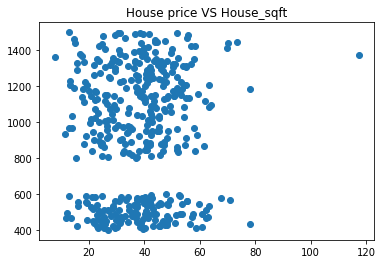

In [47]:
plt.scatter(df.House_price,df.House_sqft)
plt.title('House price VS House_sqft')

Text(0.5, 1.0, 'Price VS Location')

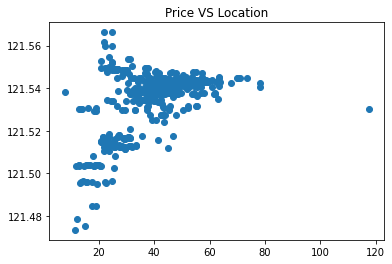

In [48]:
plt.scatter(df.House_price,df.longitude)
plt.title('Price VS Location')

Text(0.5, 1.0, 'Price VS Location')

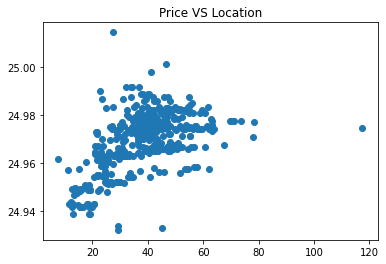

In [49]:
plt.scatter(df.House_price,df.latitude)
plt.title('Price VS Location')

Text(0.5, 1.0, 'Bedroom VS Price')

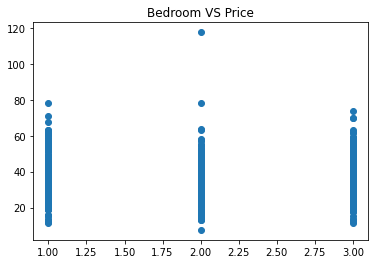

In [50]:
plt.scatter(df.Bedrooms,df.House_price)
plt.title('Bedroom VS Price')

Text(0.5, 1.0, 'House price Vs Nearest to Metro Stations')

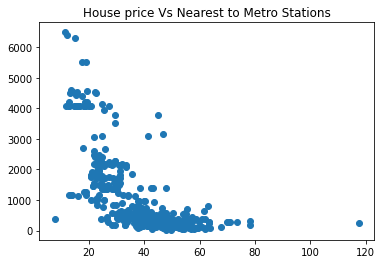

In [52]:
plt.scatter(df.House_price,df.Metro_stations)
plt.title('House price Vs Nearest to Metro Stations')

Text(0.5, 1.0, 'House price based on Age of the house ')

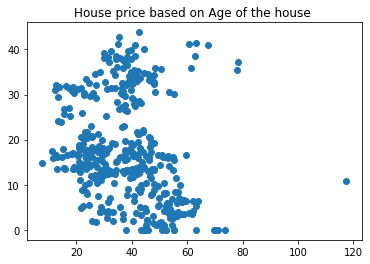

In [59]:
plt.scatter(df.House_price,df.House_age)
plt.title("House price based on Age of the house ")

Text(0.5, 1.0, 'House prices near the convenience stores')

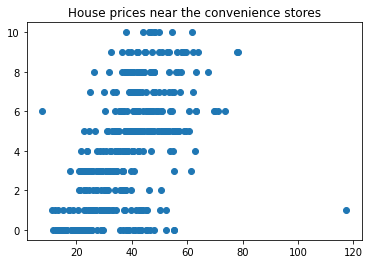

In [60]:
plt.scatter(df.House_price,df.Convenience_stores)
plt.title('House prices near the convenience stores')

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split

In [64]:
regr= LinearRegression()
labels= df['House_price']
convinent_date=[1 if values == 2015 else 0 for values in df.Transaction_date]
df['Transaction_date'] =convinent_date
